In [164]:
from perceptron import neuron
from sklearn import datasets
import numpy as np
from perceptron import training as tr
import pickle

iris = datasets.load_iris()


mask = iris.target != 1
iris.target = iris.target[mask]
iris.target[iris.target == 2] **= 0
iris.target_names = np.array(iris.target_names)[[0,2]]
iris.data = iris.data[mask][:,[0,2]]
iris.feature_names = np.array(iris.feature_names)[[0,2]]
iris.data = (iris.data * 10).astype(int)
#iris.target = iris.target * 2
#iris.target = iris.target + 1

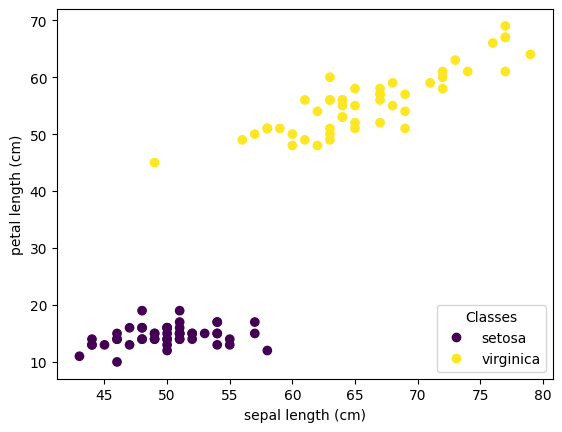

In [165]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [166]:

data = iris.data.astype(np.uint8).T
sepal = np.unpackbits(data[0], axis=0)
sepal = np.array(np.split(sepal,len(sepal)/8,axis=0))
sepal = np.expand_dims(sepal,1)
petal = np.unpackbits(data[1], axis=0)
petal = np.array(np.split(petal,len(petal)/8,axis=0))
petal = np.expand_dims(petal,1)
petal = petal.transpose(0,2,1)
percepts = (petal @ sepal)



percepts[0,...]

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [167]:

neu = neuron()

tr.import_model(neu)

tr.fit(
    sensory_units = 64,
    association_units = 82,
    response_units = 2,
    a_unit_threshold = 0.569,
    r_unit_threshold = 0.5763,
    a_unit_min_weight = 0.02
    )

In [168]:


percept_indexes = np.arange(100)
np.random.shuffle(percept_indexes)
training_percepts = percept_indexes[:70]
testing_percepts = percept_indexes[30:]
training_percepts_x = np.random.choice(training_percepts, 50, replace=False )
results = tr.predictions(percepts[training_percepts_x])
accuracy = tr.accuracy(results, iris.target[training_percepts_x])

accuracy

array([[0.        , 0.        , 0.16666667],
       [0.        , 1.        , 0.57692308],
       [1.        , 0.        , 0.54166667],
       [1.        , 1.        , 0.15384615],
       [2.        , 0.        , 0.25      ],
       [2.        , 1.        , 0.26923077],
       [3.        , 0.        , 0.04166667]])

In [169]:
kwargs  = {
    'priority_weight': 4,
    'secondary_weight': 1,
    'damper': 1,
    'offset': 0
}

percept_indexes = np.arange(100)
np.random.shuffle(percept_indexes)
training_percepts = percept_indexes[:70]
testing_percepts = percept_indexes[30:]
training_percepts_x = np.random.choice(training_percepts, 50, replace=False )


for r in range(50):
    np.random.shuffle(percept_indexes)
    training_percepts_x = np.random.choice(training_percepts, 50, replace=False )
    results = tr.reinforce(percepts[training_percepts_x], iris.target[training_percepts_x], kwargs=kwargs)
    #accuracy = tr.accuracy(results, iris.target[training_percepts_x])

results = tr.predictions(percepts[testing_percepts])
accuracy = tr.accuracy(results, iris.target[testing_percepts])

accuracy

array([[0.        , 0.        , 0.75      ],
       [0.        , 1.        , 0.23529412],
       [1.        , 0.        , 0.25      ],
       [1.        , 1.        , 0.76470588]])

In [170]:

results = tr.predictions(percepts)
accuracy = tr.accuracy(results, iris.target)

accuracy

array([[0.  , 0.  , 0.76],
       [0.  , 1.  , 0.24],
       [1.  , 0.  , 0.24],
       [1.  , 1.  , 0.76]])

In [172]:

#file_iris = open('perceptron_mk1_model_iris.obj', 'wb') 
#pickle.dump(tr.__model, file_iris)